In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [3]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

Using device: cuda


In [4]:
df = pd.read_csv('/content/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(36892, 785)

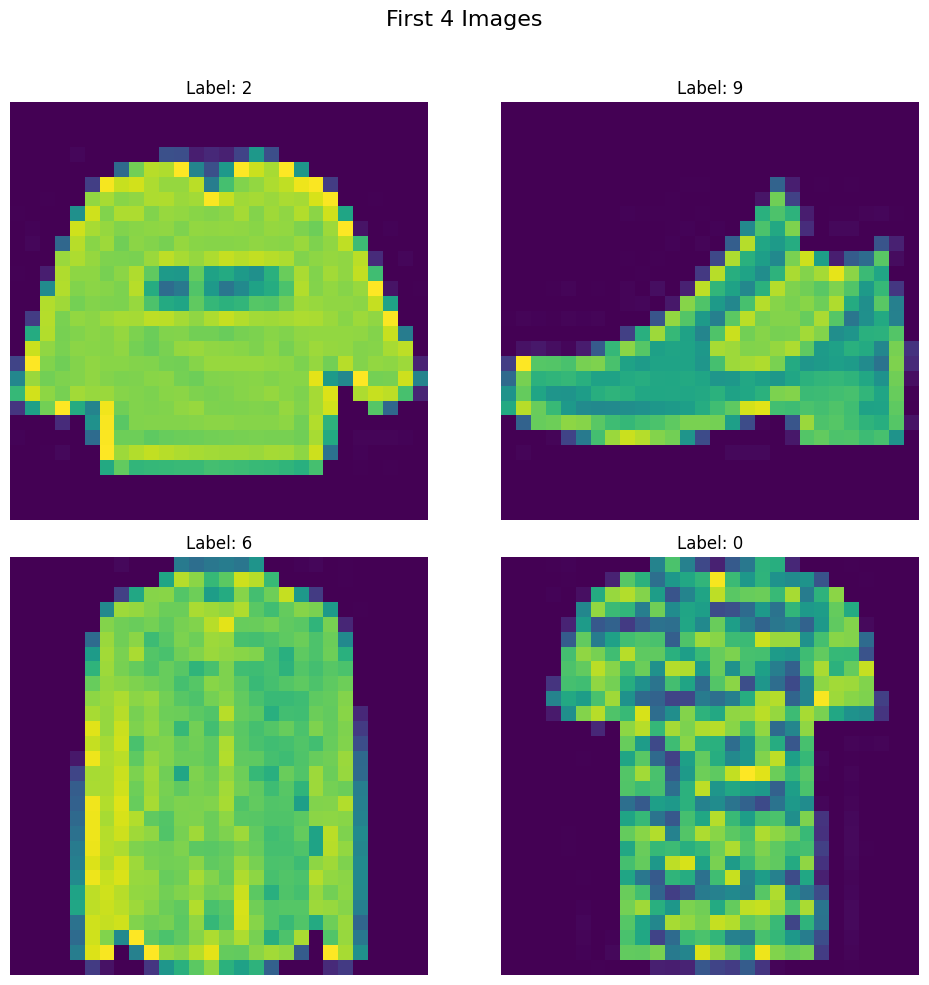

In [6]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle("First 4 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()


In [7]:
# train test split

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
class CustomDataset(Dataset):

  def __init__(self, features, labels):

    # Convert to PyTorch tensors
    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels, dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self, index):
    return self.features[index], self.labels[index]

In [9]:
train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, pin_memory=True)

len(train_loader)

class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, 10)

    )

  def forward(self, x):

    return self.model(x)

learning_rate = 0.1
epochs = 100

# instatiate the model
model = MyNN(X_train.shape[1])
model = model.to(device)
# loss function
criterion = nn.CrossEntropyLoss()
# optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [10]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.7275194768528509
Epoch: 2 , Loss: 0.46700322960593205
Epoch: 3 , Loss: 0.4154010762179014
Epoch: 4 , Loss: 0.3851594577905674
Epoch: 5 , Loss: 0.3585619860745458
Epoch: 6 , Loss: 0.3429991319969313
Epoch: 7 , Loss: 0.32798032801626564
Epoch: 8 , Loss: 0.3141965561648296
Epoch: 9 , Loss: 0.2998907453121208
Epoch: 10 , Loss: 0.2904450970369907
Epoch: 11 , Loss: 0.28410527937090024
Epoch: 12 , Loss: 0.27287854225993285
Epoch: 13 , Loss: 0.2626183367458415
Epoch: 14 , Loss: 0.2543203993897203
Epoch: 15 , Loss: 0.24895948166974122
Epoch: 16 , Loss: 0.24209313165045315
Epoch: 17 , Loss: 0.23403527071640978
Epoch: 18 , Loss: 0.22645473044732928
Epoch: 19 , Loss: 0.22007511427196172
Epoch: 20 , Loss: 0.2172517915168537
Epoch: 21 , Loss: 0.2099559681927977
Epoch: 22 , Loss: 0.20856255345361333
Epoch: 23 , Loss: 0.20526602177932166
Epoch: 24 , Loss: 0.19667682090102173
Epoch: 25 , Loss: 0.18908779632667422
Epoch: 26 , Loss: 0.18564838129030148
Epoch: 27 , Loss: 0.1812333225122

In [11]:
model.eval()

# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8864344762162895


In [12]:
# evaluation code
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.9878358689391116


**In the above case, we see that the difference between accuracies on train and test data is almost 10% which suggests that there is the overfitting problem and hence, we need to try out Regularisation(L2), Dropouts, Batch Normalisation, etc. to fix this issue to some extent.**

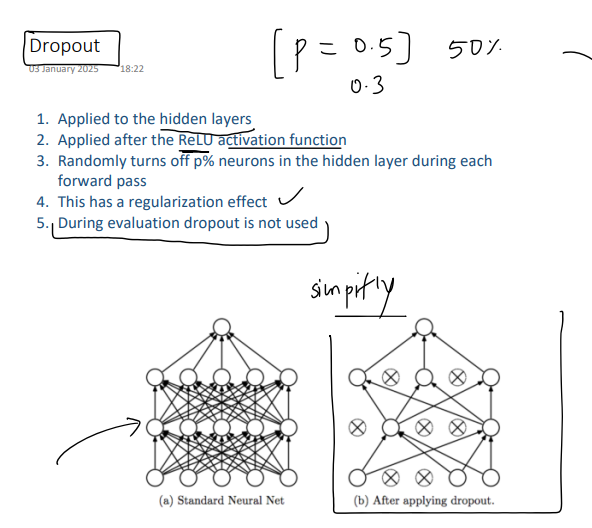

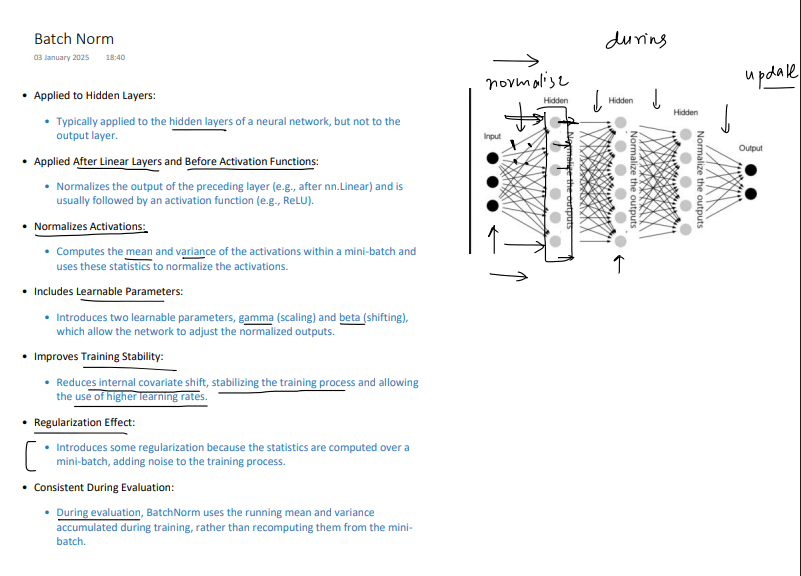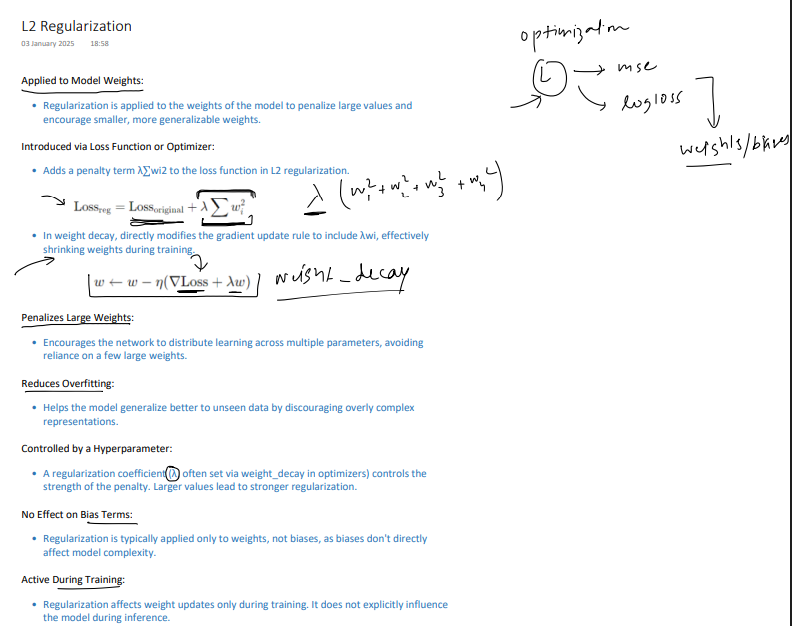

In [13]:
class MyoptimisedNN(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

In [14]:
mymodel = MyoptimisedNN(X_train.shape[1])

mymodel.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(mymodel.parameters(), lr=0.1, weight_decay=1e-4)

In [15]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    # forward pass
    outputs = mymodel(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.6717920668689557
Epoch: 2 , Loss: 0.5243486275297073
Epoch: 3 , Loss: 0.48320987394416576
Epoch: 4 , Loss: 0.455078415855168
Epoch: 5 , Loss: 0.4381475720397184
Epoch: 6 , Loss: 0.42136386841664725
Epoch: 7 , Loss: 0.4043171963253879
Epoch: 8 , Loss: 0.39947317691594525
Epoch: 9 , Loss: 0.3889851447917271
Epoch: 10 , Loss: 0.37878914403437536
Epoch: 11 , Loss: 0.3682788092550193
Epoch: 12 , Loss: 0.36149203918575595
Epoch: 13 , Loss: 0.3603077530376573
Epoch: 14 , Loss: 0.35356277919990914
Epoch: 15 , Loss: 0.3439834162124704
Epoch: 16 , Loss: 0.33859111012675003
Epoch: 17 , Loss: 0.33985471378362064
Epoch: 18 , Loss: 0.3374056954941796
Epoch: 19 , Loss: 0.3340818015929162
Epoch: 20 , Loss: 0.3264752527535414
Epoch: 21 , Loss: 0.3240776184546728
Epoch: 22 , Loss: 0.3223079626053927
Epoch: 23 , Loss: 0.3210265109333677
Epoch: 24 , Loss: 0.3179754336906409
Epoch: 25 , Loss: 0.3147114954267266
Epoch: 26 , Loss: 0.3041174837013753
Epoch: 27 , Loss: 0.312675981018551
Epoc

In [16]:
model.eval()

# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = mymodel(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.8562135790757556


In [17]:
# evaluation on training data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = mymodel(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.923389692677803


**So, now the test accuracy hasn't dropped much from 88% to 86%.... but the train accuracy falls from 98% to 90.5%. So we havebeen able to bring down the gap in accuracy between train and test data to almost 4% from 10% by just doing Batch Norm and Dropouts and Regularisation!**